<h1>MAJOR PROJECT</h1>

- >**Problem Statement: Predict the costs of used cars given the data collected from various sources and distributed across various locations in India.**


<h6>Importing necessary libraries</h6>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h6>Reading the dataset</h6>

In [2]:
data=pd.read_excel("Data_Train.xlsx")

<h6>Displaying the dataset</h6>

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


<h2>Exploratory Data Analysis</h2>

<h3>Analysing the dataset</h3>

In [5]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [7]:
data.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [8]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<h3>Removing anomalies and dropping missing values</h3>

In [9]:
data = data[data.Power!='null bhp']

In [10]:
data.Mileage = data.Mileage.str.replace(' km/kg',' kmpl')
data.Mileage = data.Mileage.str.replace(' kmpl','').astype(float)
data.Engine = data.Engine.str.replace(' CC','').astype(float)
data.Power = data.Power.str.replace(' bhp','').astype(float)

In [11]:
data=data.dropna(how='any')

In [12]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [13]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<h3>Checking for Outliers in the Dataset</h3>

<AxesSubplot:ylabel='Year'>

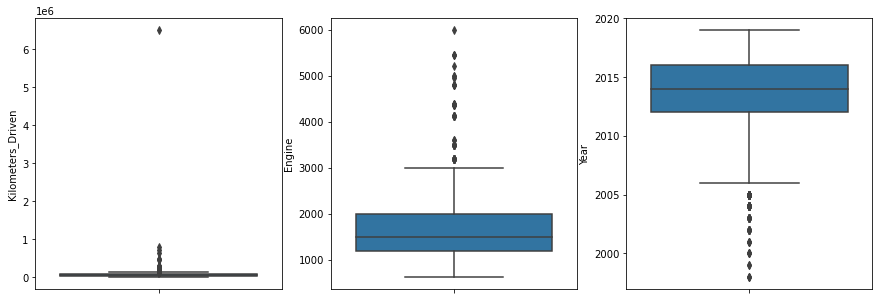

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(y="Kilometers_Driven", data=data)

plt.subplot(132)
sns.boxplot(y="Engine", data=data)

plt.subplot(133)
sns.boxplot(y="Year", data=data)

<AxesSubplot:ylabel='Mileage'>

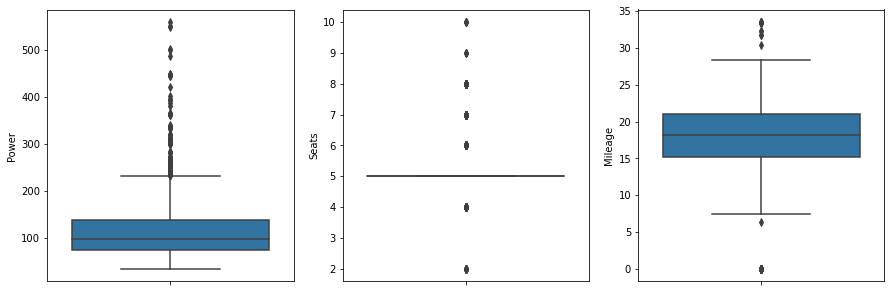

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(y="Power", data=data)

plt.subplot(132)
sns.boxplot(y="Seats", data=data)

plt.subplot(133)
sns.boxplot(y="Mileage", data=data)

<h2>Univariate Analysis</h2>

<h3> Grouping Categorical and Numerical Variables</h3>

In [16]:
columns = ['Name', 'Location','Fuel_Type','Transmission', 'Owner_Type', 'Year', 'Kilometers_Driven',  'Mileage', 'Engine', 'Power', 'Seats','Price']
data = data.reindex(columns=columns)

In [17]:
data.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,2010,72000,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,Petrol,Manual,First,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,2013,40670,15.20,1968.0,140.80,5.0,17.74


<h3>Analysing Categorical Variables</h3>

<h4>Splitting Name into Brand Model and Version</h4>

In [18]:
columns = ['Name', 'Brand', 'Model','Version', 'Location','Fuel_Type','Transmission', 'Owner_Type', 'Year', 'Kilometers_Driven',  'Mileage', 'Engine', 'Power', 'Seats','Price']
data = data.reindex(columns=columns)
data.Brand = data.Name.apply(lambda a:a.split()[0])
data.Model= data.Name.apply(lambda a:a.split()[1])
data.Version= data.Name.apply(lambda a:a.split()[2:])
version=[]
for i in data.Version:
    version.append(" ".join(i))
data.Version=version
data=data.drop(columns='Name')
data.head()

,Brand,Model,Version,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,R LXI CNG,Mumbai,CNG,Manual,First,2010,72000,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Pune,Diesel,Manual,First,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz,V,Chennai,Petrol,Manual,First,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga,VDI,Chennai,Diesel,Manual,First,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,2013,40670,15.20,1968.0,140.80,5.0,17.74


<h6>Brand</h6>

In [19]:
data.Brand.nunique()

30

In [20]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [21]:
data.Brand.value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Bentley             1
Lamborghini         1
Isuzu               1
Name: Brand, dtype: int64

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Nissan'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Volkswagen'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Land'),
  Text(9, 0, 'Mitsubishi'),
  Text(10, 0, 'Renault'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Jaguar'),
  Text(18, 0, 'Volvo'),
  Text(19, 0, 'Chevrolet'),
  Text(20, 0, 'Skoda'),
  Text(21, 0, 'Mini'),
  Text(22, 0, 'Fiat'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Ambassador'),
  Text(25, 0, 'Isuzu'),
  Text(26, 0, 'ISUZU'),
  Text(27, 0, 'Force'),
  Text(28, 0, 'Bentley'),
  Text(29, 0, 'Lamborghini')])

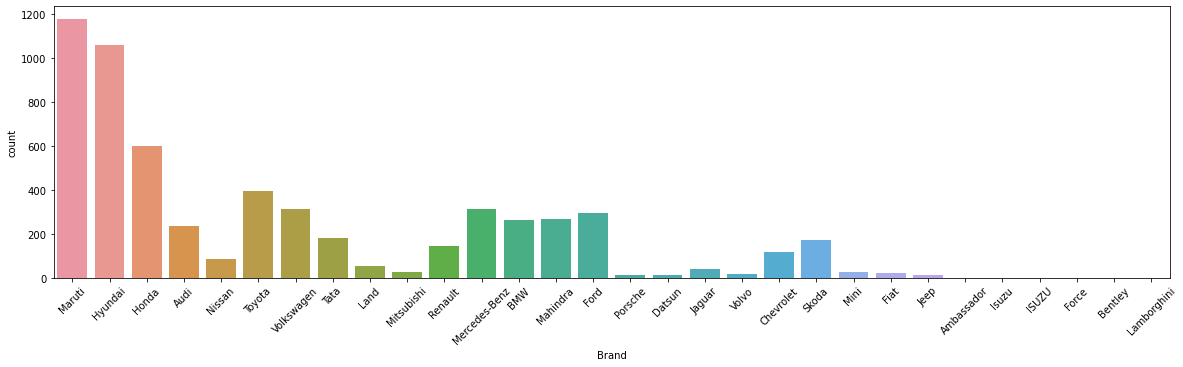

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(data.iloc[:,0],data=data)
plt.xticks(rotation=45)

<h6>Inference</h6>

- > There are **30** unique car **Brands**
- > **Maruti** cars forms majority

<h6>Model</h6>

In [23]:
data.Model.nunique()

203

In [24]:
data.Model.unique()

array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
       'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
       'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
       'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
       'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
       'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
       'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport', 'Verna', 'GO', 'Omni',
       'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B', 'Scorpio', 'CR-V',
       'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb', 'X5', 'GLC',
       'Countryman', 'Fiesta', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
       'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
       'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
       'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
       'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman',
       '

<h6>Inference</h6>

- > There are **203** unique **Models**

<h6>Version</h6>

In [25]:
data.Version.nunique()

1683

In [26]:
data.Version.unique()

array(['R LXI CNG', '1.6 CRDi SX Option', 'V', ...,
       'IPL II 1.2 Petrol Highline', 'Revotron XT', 'D4 BSIV'],
      dtype=object)

<h6>Inference</h6>

- > There are **1683** unique **Versions**

<h6>Location</h6>

In [27]:
data.Location.nunique()

11

In [28]:
data.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [29]:
data.Location.value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

<AxesSubplot:>

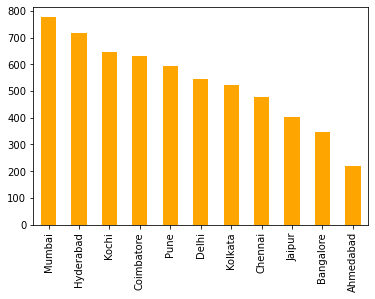

In [30]:
data.Location.value_counts().plot(kind='bar',color='orange')

<h6>Inference</h6>

- > There are **11** unique **Locations**
- > Most number of cars are from **Mumbai** and least are from **Ahmedabad**

<h6>Fuel Type</h6>

In [31]:
data.Fuel_Type.nunique()

4

In [32]:
data.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [33]:
data.Fuel_Type.value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<AxesSubplot:>

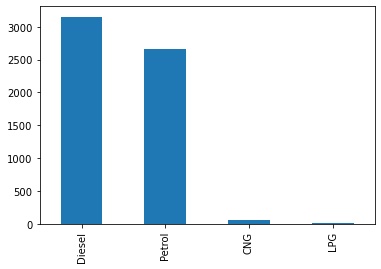

In [34]:
data.Fuel_Type.value_counts().plot(kind='bar')

<h6>Inference</h6>

- > There are **4** unique **Fuel Types**
- > Most of the cars are **Diesel** and **Petrol** driven with **Diesel** being majority and only a few are **LPG** and **CNG** with **LPG** being minority

<h6>Transmission</h6>

In [35]:
data.Transmission.nunique()

2

In [36]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [37]:
data.Transmission.value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<AxesSubplot:ylabel='Transmission'>

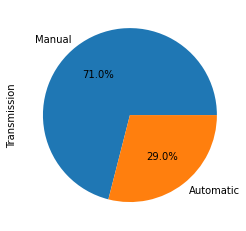

In [38]:
data.Transmission.value_counts().plot.pie(autopct="%1.1f%%")

<h6>Inference</h6>

- > There are **2** unique **Transmission**
- > Most number of cars are **Manual**, Manual(71%), Automatic(29%)

<h6>Owner Type</h6>

In [39]:
data.Owner_Type.nunique()

4

In [40]:
data.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [41]:
data.Owner_Type.value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

<AxesSubplot:ylabel='Owner_Type'>

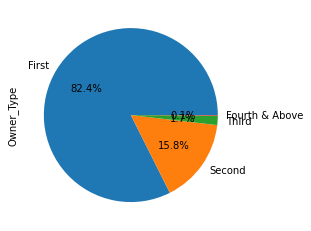

In [42]:
data.Owner_Type.value_counts().plot.pie(autopct="%1.1f%%")

<h6>Inference</h6>

- > There are **4** unique **Owner Type**
- > Most number of cars are under **First Ownership** and very few are under **Fourth & above**

<h3>Analysing Numerical Variables</h3>

<h6>Year</h6>

In [43]:
data.Year.nunique()

22

In [44]:
data.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2004, 2002, 2000, 2005, 2003, 1999, 1998, 2001],
      dtype=int64)

In [45]:
data.Year.value_counts()

2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2001      4
2000      4
1998      3
1999      2
Name: Year, dtype: int64

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

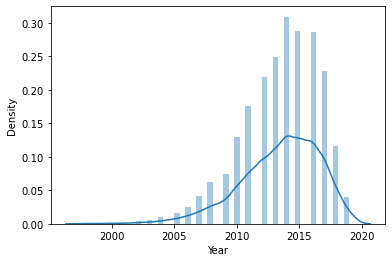

In [46]:
sns.distplot(data.Year)

<h6>Inference</h6>

- > There are car models over **22 Years**
- > Majority of them are **2014** models
- > Models below **2008** are minority.

<h6>Kilometers Driven</h6>

In [47]:
data.Kilometers_Driven.nunique()

3038

In [48]:
data.Kilometers_Driven.sort_values(ascending=True).head()

1361     171
5606     600
173     1000
5339    1000
2054    1000
Name: Kilometers_Driven, dtype: int64

In [49]:
data.Kilometers_Driven.sort_values(ascending=True).tail()

2823     480000
358      620000
1860     720000
340      775000
2328    6500000
Name: Kilometers_Driven, dtype: int64

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

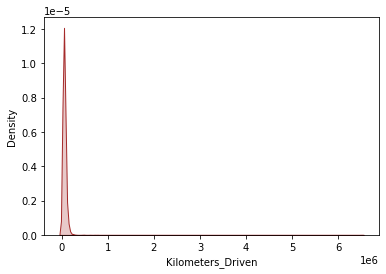

In [50]:
sns.kdeplot(data.Kilometers_Driven,shade=True,color='brown')


<h6>Inference</h6>

- > These are the Kilometers Driven with highest being 6500000 and the lowest being 171

<h6>Mileage</h6>

In [51]:
data.Mileage.nunique()

429

In [52]:
data.Mileage.value_counts()

18.90    172
17.00    149
18.60    119
20.36     88
21.10     87
        ... 
19.68      1
21.72      1
14.45      1
15.42      1
8.77       1
Name: Mileage, Length: 429, dtype: int64

In [53]:
data.Mileage.sort_values(ascending=False).head()

4141    33.54
3129    33.54
1332    33.54
2059    33.54
2371    33.54
Name: Mileage, dtype: float64

In [54]:
data.Mileage.sort_values(ascending=False).tail()

707     0.0
4687    0.0
544     0.0
5972    0.0
4302    0.0
Name: Mileage, dtype: float64

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage'>

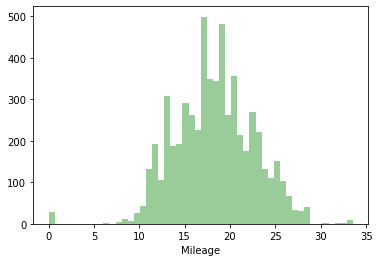

In [55]:
sns.distplot(data.Mileage,kde=False,hist=True,color='g')

<h6>Inference</h6>

- > There are **429** unique values for **Mileage**
- > Maximum **Mileage** of the car in the given dataset is **33.54 kmpl** and minimum is **0 kmpl**.
- > Majority of cars have a **Mileage** between **15 kmpl** and **20 kmpl**

<h6>Engine</h6>

In [56]:
data.Engine.nunique()

139

In [57]:
data.Engine.value_counts()

1197.0    604
1248.0    496
1498.0    303
998.0     259
2179.0    240
         ... 
2925.0      1
2773.0      1
2720.0      1
2495.0      1
2999.0      1
Name: Engine, Length: 139, dtype: int64

In [58]:
data.Engine.sort_values(ascending=False).head()

5521    5998.0
4691    5461.0
4722    5461.0
152     5461.0
5781    5204.0
Name: Engine, dtype: float64

In [59]:
data.Engine.sort_values(ascending=False).tail()

4561    624.0
761     624.0
740     624.0
523     624.0
5474    624.0
Name: Engine, dtype: float64

<AxesSubplot:xlabel='Engine'>

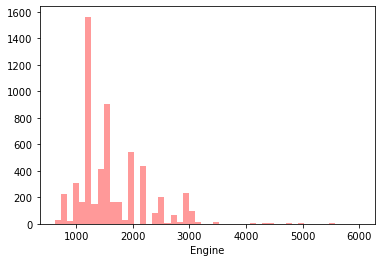

In [60]:
sns.distplot(data.Engine,kde=False,hist=True,color='r')

<h6>Inference</h6>

- > There are **139** unique values for **Engine**
- > Highest being **5998 CC** and lowest being **624 CC**
- > Majority is between **1200 CC** and **1600 CC**

<h6>Power</h6>

In [61]:
data.Power.nunique()

368

In [62]:
data.Power.sort_values(ascending=False).head()

5781    560.0
5521    552.0
2100    550.0
5088    503.0
70      500.0
Name: Power, dtype: float64

In [63]:
data.Power.sort_values(ascending=False).tail()

3091    34.2
3321    34.2
1008    34.2
1912    34.2
790     34.2
Name: Power, dtype: float64

<AxesSubplot:xlabel='Power', ylabel='Density'>

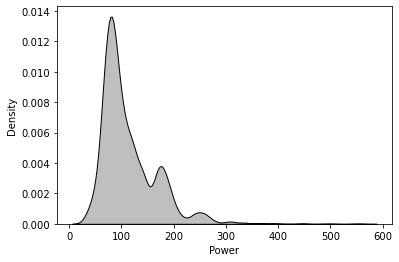

In [64]:
sns.kdeplot(data.Power,shade=True,color='k')

<h6>Inference</h6>

- > There are **368** unique values for **Power**
- > Highest being **560 bhp** and lowest being **34.2 bhp**
- > Most cars have **Power** around **100 bhp**

<h6>Seats</h6>

In [65]:
data.Seats.nunique()

8

In [66]:
data.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

In [67]:
data.Seats.value_counts()

5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats', ylabel='count'>

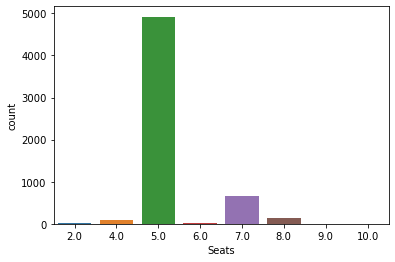

In [68]:
sns.countplot(data.Seats)

<h6>Inference</h6>

- > There are **8** unique values for **Seats**
- > Majority of the cars are **5 seaters**, **2 seaters** and **6 seaters** are the minority

<h3>Bivariate Analysis</h3>

<h5> With respect to Brand</h5>
<h6>Bar Plots</h6>

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


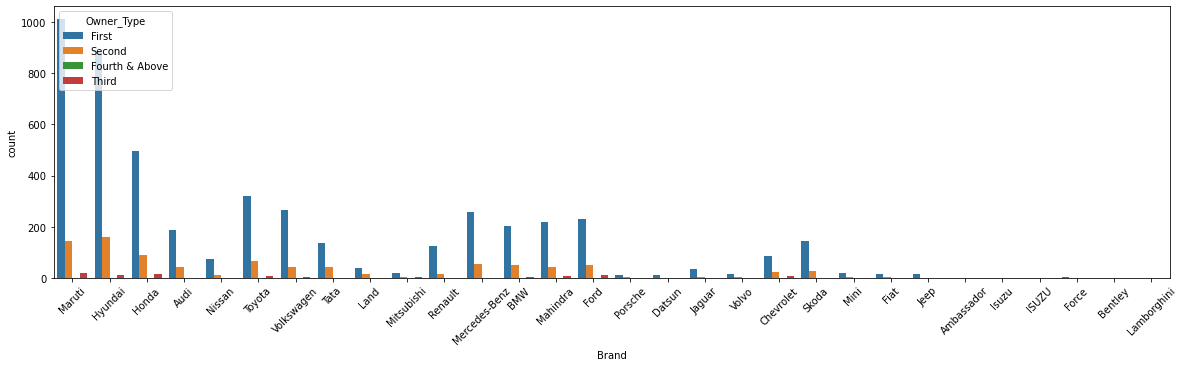

In [69]:
plt.figure(figsize=(20,5))
sns.countplot(data.iloc[:,0],hue='Owner_Type',data=data)
plt.xticks(rotation=45);

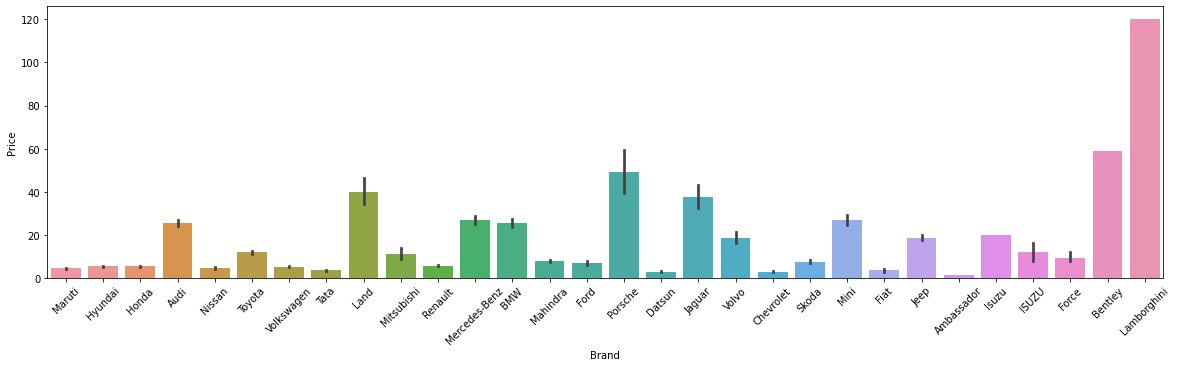

In [70]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Price',data=data)
plt.xticks(rotation=45);

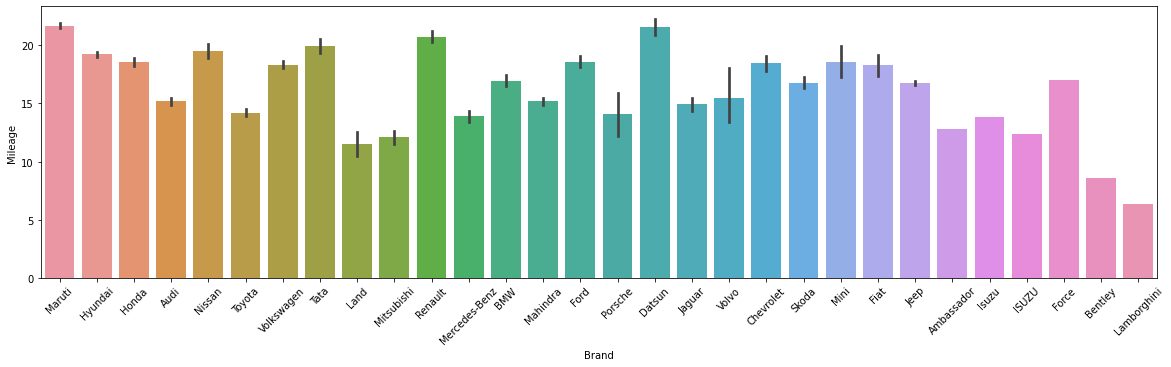

In [71]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Mileage',data=data)
plt.xticks(rotation=45);

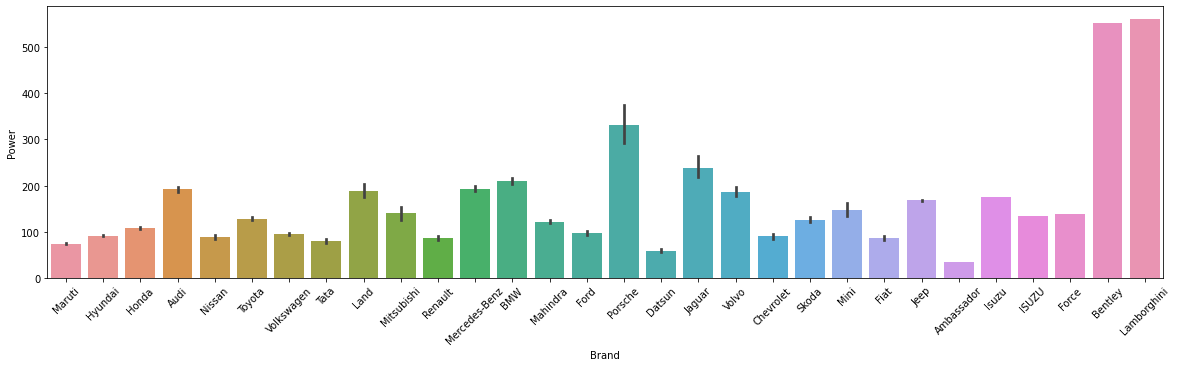

In [72]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Power',data=data)
plt.xticks(rotation=45);

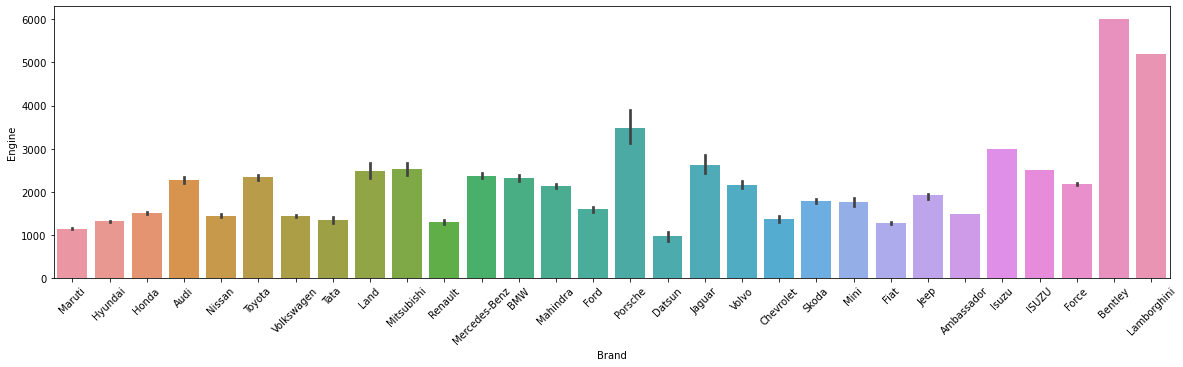

In [73]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Engine',data=data)
plt.xticks(rotation=45);

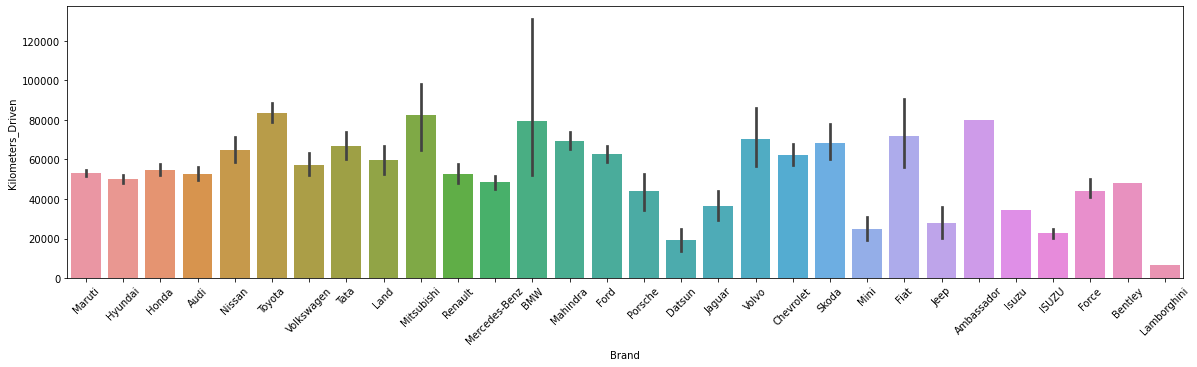

In [74]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Kilometers_Driven',data=data)
plt.xticks(rotation=45);

<h6> Inferences on Brands</h6>

- > Majority Cars are **first handed**
- > **Lambhorgini** is the **highest priced** brand followed by **Bently**
- > **Maruthi**, **Datsun** cars have highest **Mileage**
- > **Bently**, **Lambhorgini** offers highest **Engine Power**
- > **Toyota**, **Mitsubhishi**, **BMW**, **Ambassador** cars **travelled** the most

<h6>Heatmap</h6>

<AxesSubplot:>

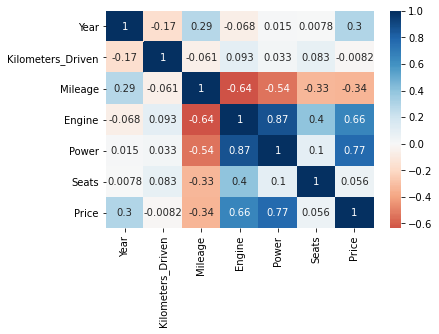

In [75]:
sns.heatmap(data.corr(),annot=True,cmap='RdBu', center=0)

<h6>Inference</h6>

- > From above heatmap, we can see Engine and Power are correlated also Year and Mileage are correlated

<h6>Implot</h6>

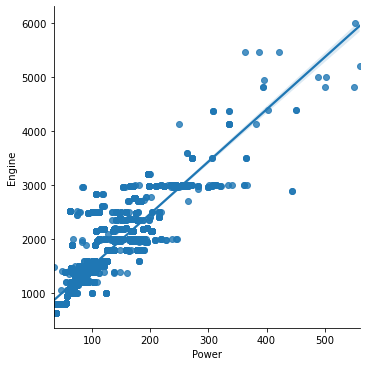

In [76]:
sns.lmplot(x='Power',y='Engine',data=data)

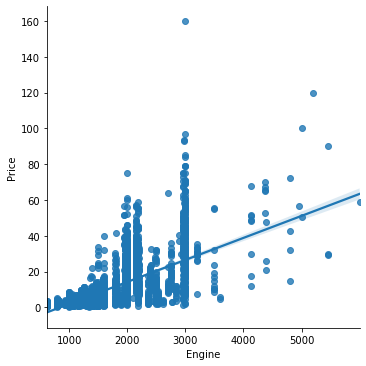

In [77]:
sns.lmplot(x='Engine',y='Price',data=data)

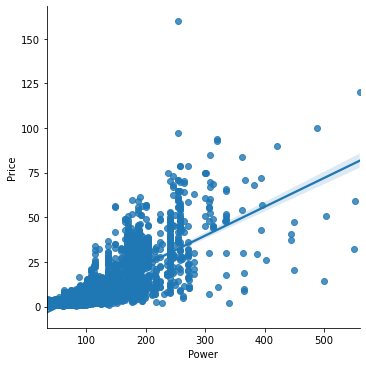

In [78]:
sns.lmplot(x='Power',y='Price',data=data)

<h6>Inference</h6>

- > From above plots we can see that **Engine** and **Power** are correlated

- > Also **Power** and **Price** are correlated, so we can drop **Engine** column

<h6>Violin Plots</h6>

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

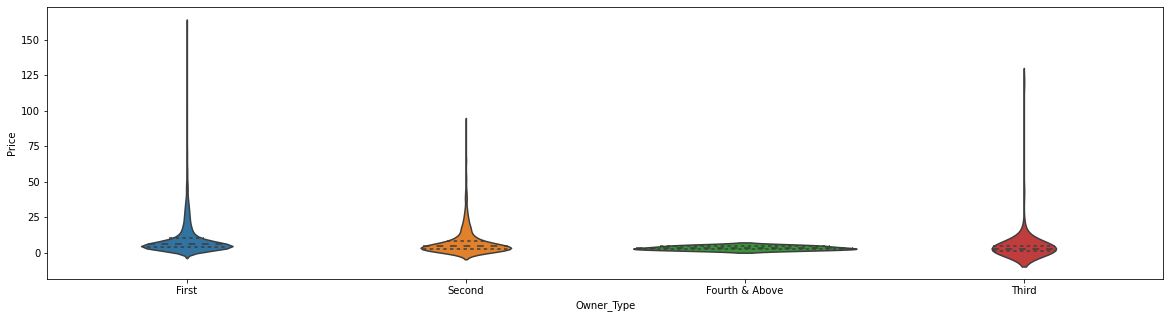

In [79]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Owner_Type',y='Price',data=data,split=True,inner='quart')

<AxesSubplot:xlabel='Location', ylabel='Price'>

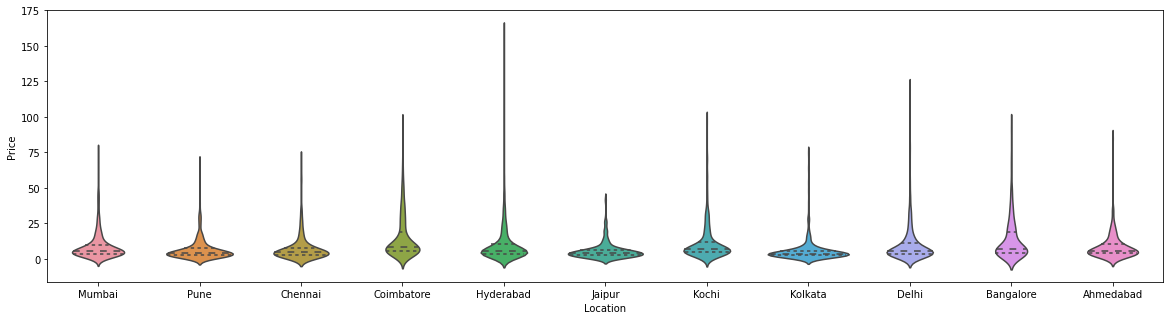

In [80]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Location',y='Price',data=data,split=True,inner='quart')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

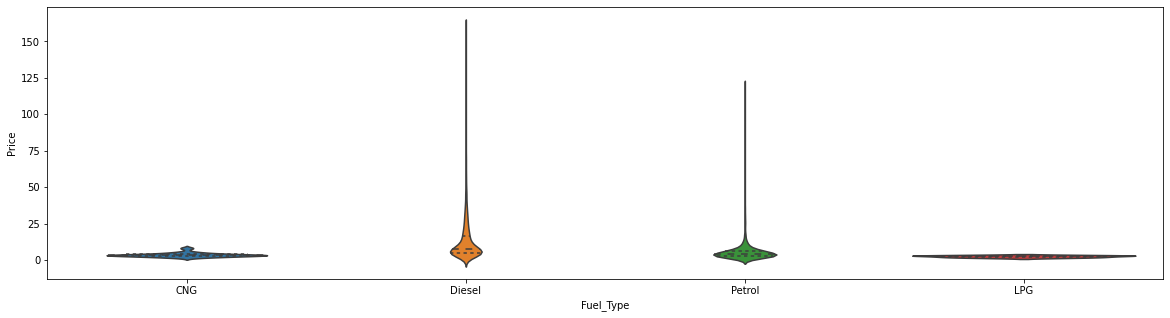

In [81]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Fuel_Type',y='Price',data=data,split=True,inner='quart')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Power'>

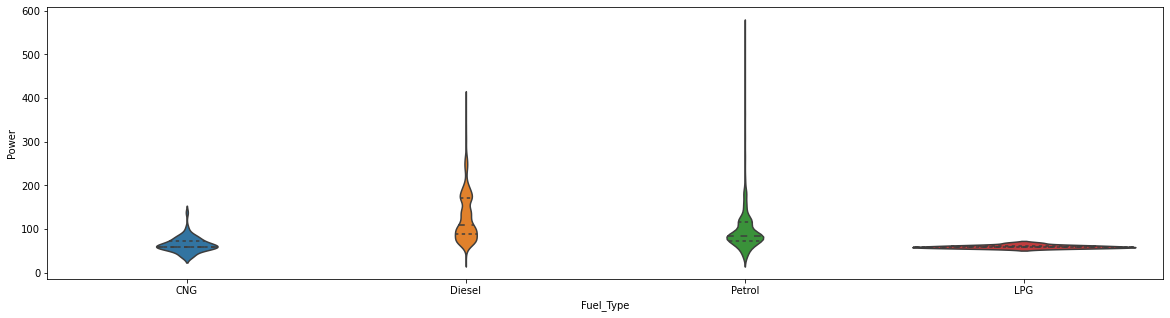

In [82]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Fuel_Type',y='Power',data=data,split=True,inner='quart')

<h6>Inferences from Violin plots</h6>

- > **Newer the car higher the Price**, which is expected
- > **Diesel cars priced higher**
- > **Petrol** and **Diesel** cars offers high **Engine Power**

<h6> Jointplot</h6>

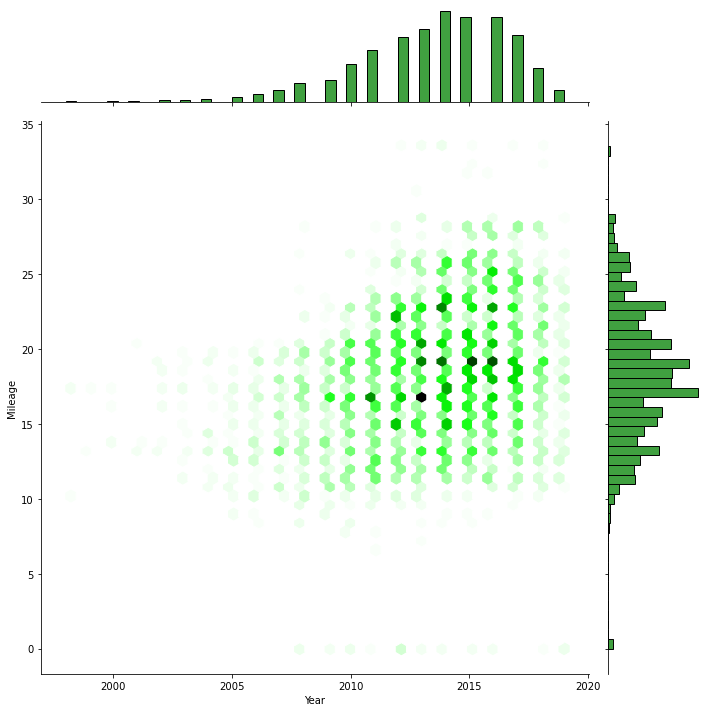

In [83]:
sns.jointplot(x='Year',y='Mileage',data=data,kind="hex",height=10,color="g")

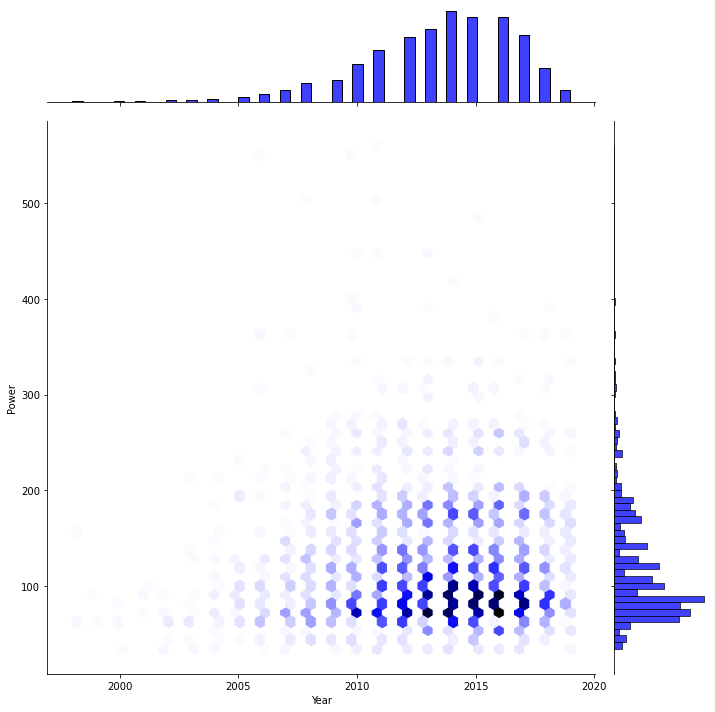

In [84]:
sns.jointplot(x='Year',y='Power',data=data,kind="hex",height=10,color="b")

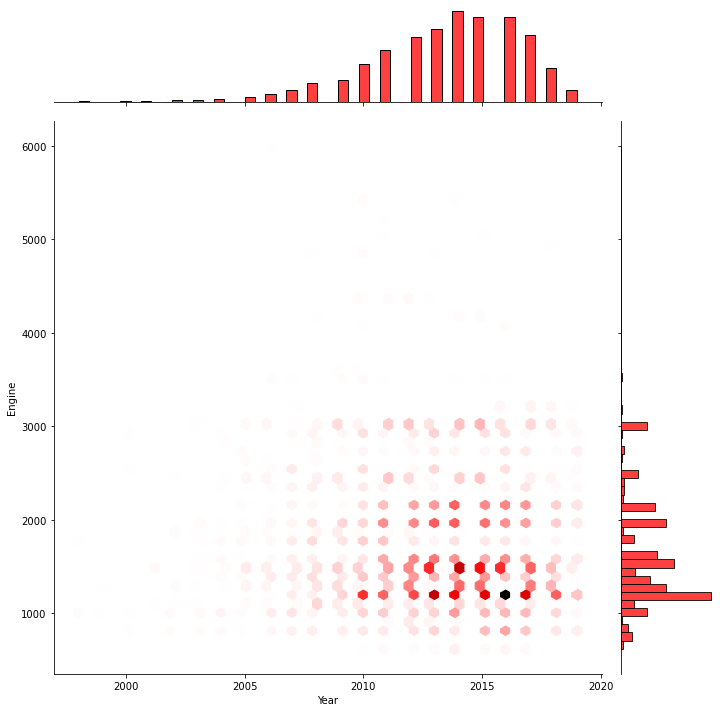

In [85]:
sns.jointplot(x='Year',y='Engine',data=data,kind="hex",height=10,color="r")

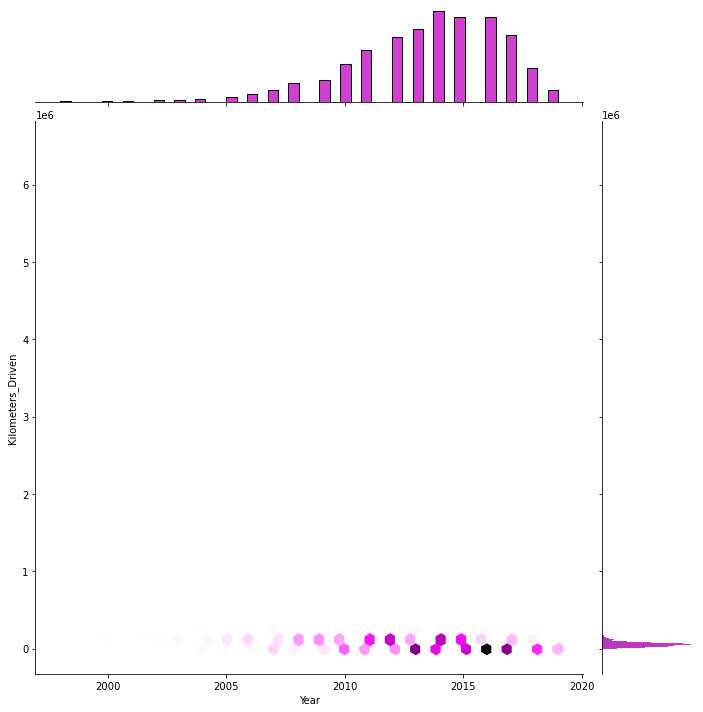

In [86]:
sns.jointplot(x='Year',y='Kilometers_Driven',data=data,kind="hex",height=10,color="m")

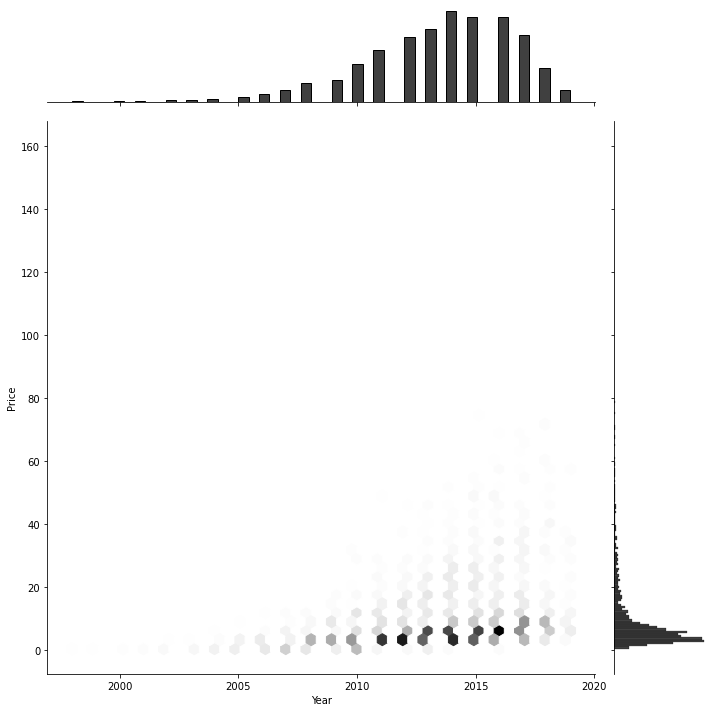

In [87]:
sns.jointplot(x='Year',y='Price',data=data,kind="hex",height=10,color="k")

<h6>Inference from Jointplots</h6>

- > Majority of the cars are around **2015** model.
- > Majority of the cars have **Mileage** between **15** and **20 kmpl**
- > Majority of the cars have an **Engine** between **1200 CC** and **1600 CC**
- > Majority of the cars have **Power** around **100 bhp**
- > Majority of the cars have driven around **100** Kilometers
- > **Price** of majority of Cars is between **10** and **15 Lakhs**

<h6>Pairplot</h6>

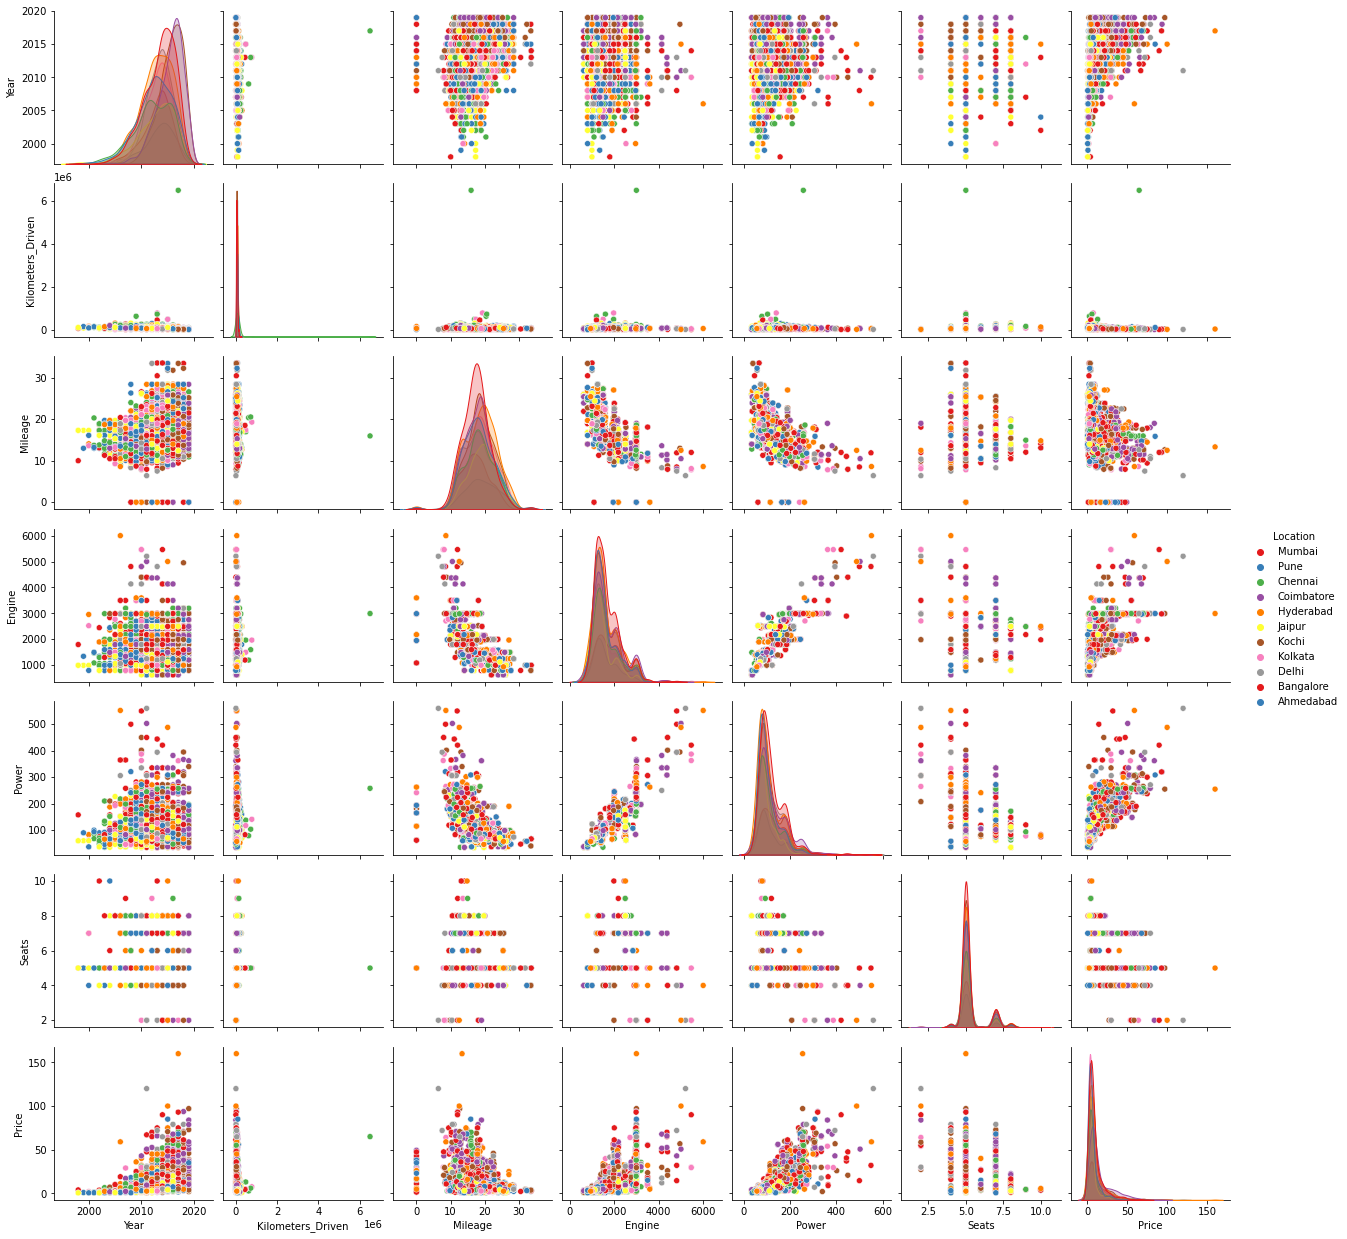

In [88]:
sns.color_palette("Set1", n_colors=11, desat=.5)
sns.pairplot(data, hue="Location",palette="Set1")

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


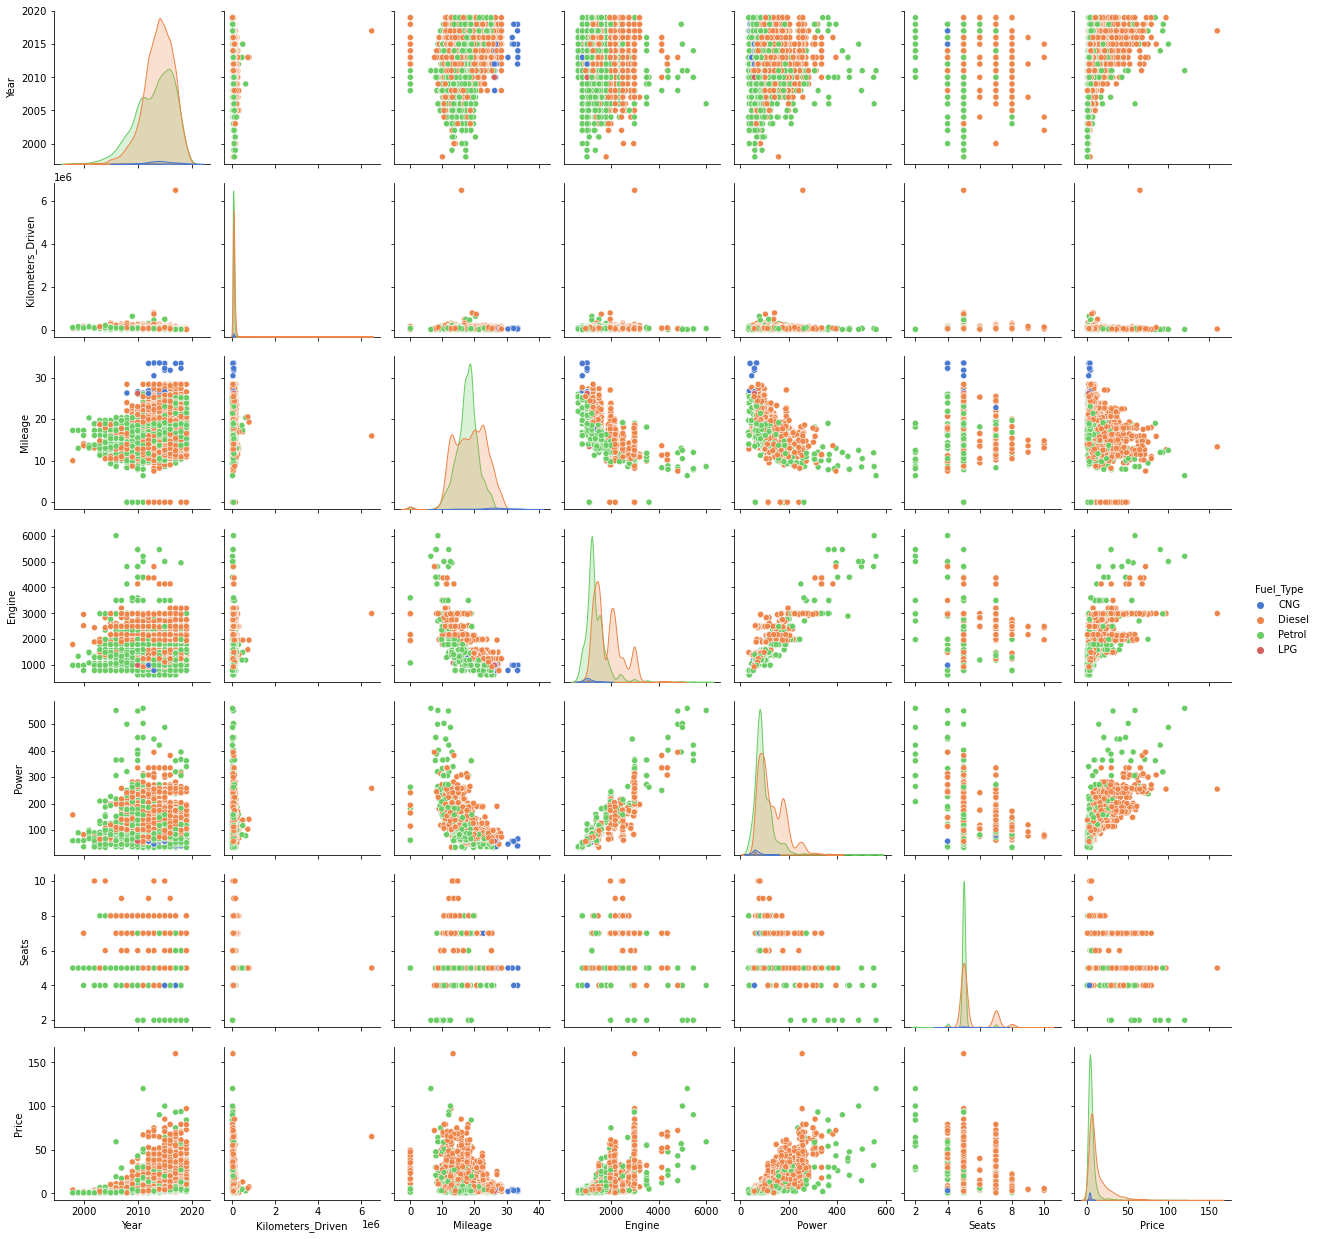

In [89]:
sns.pairplot(data,hue="Fuel_Type",palette="muted")

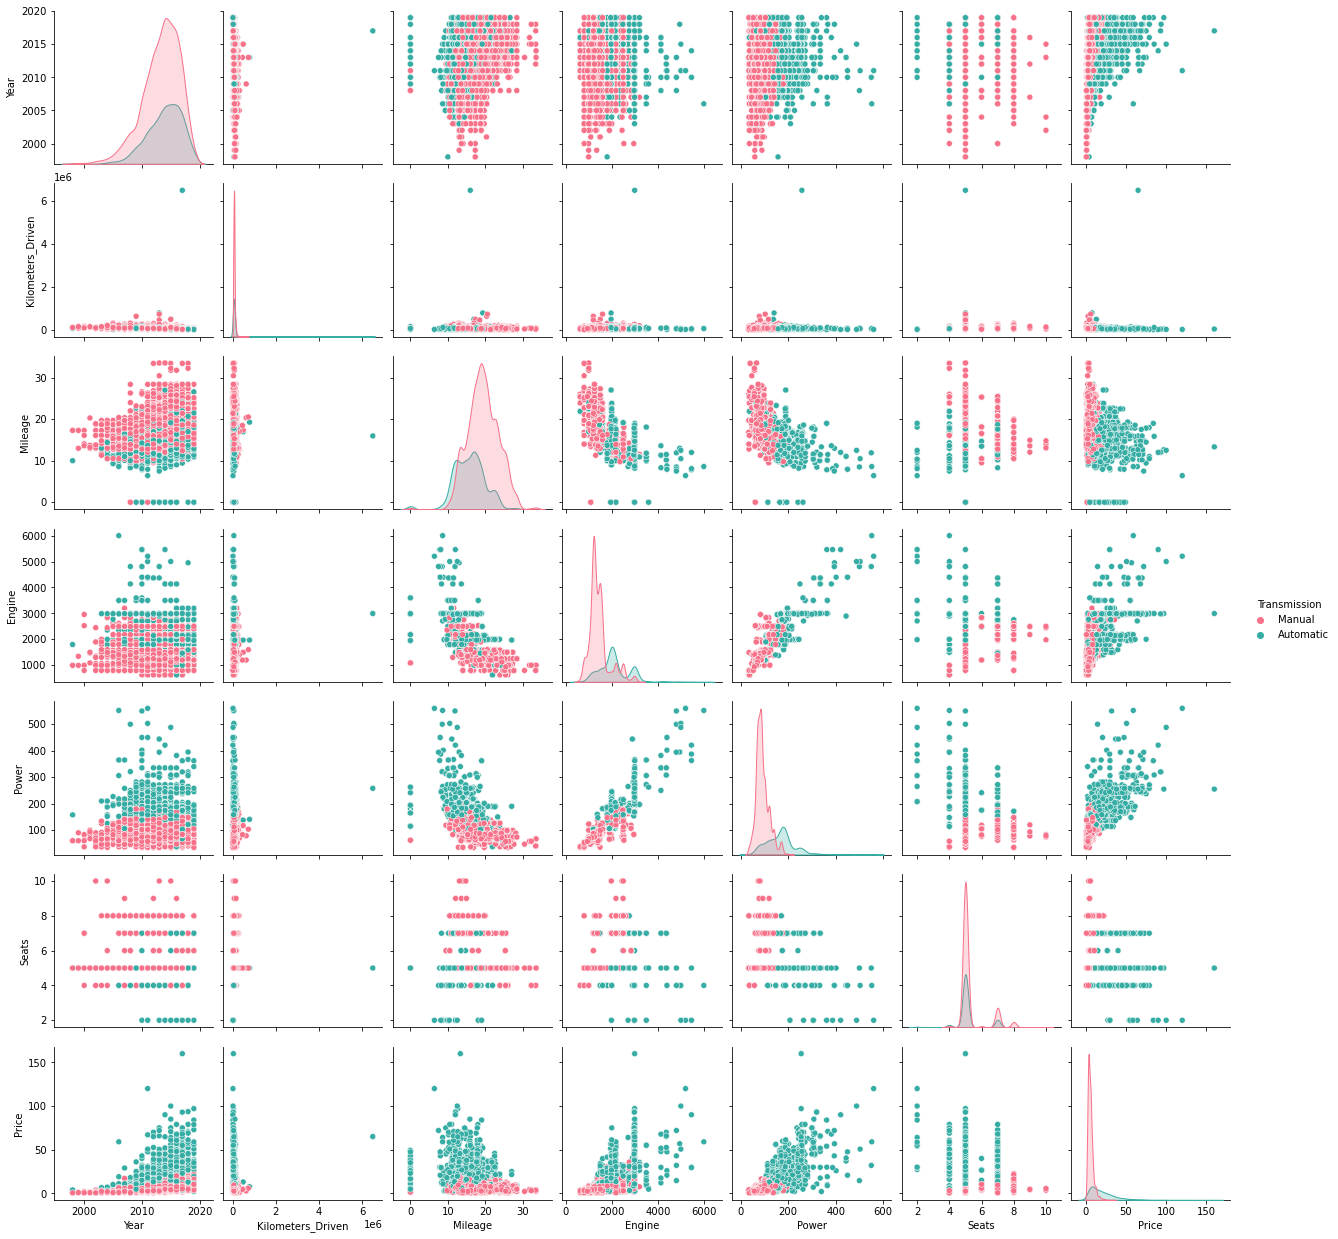

In [90]:
sns.pairplot(data,hue="Transmission",palette="husl")

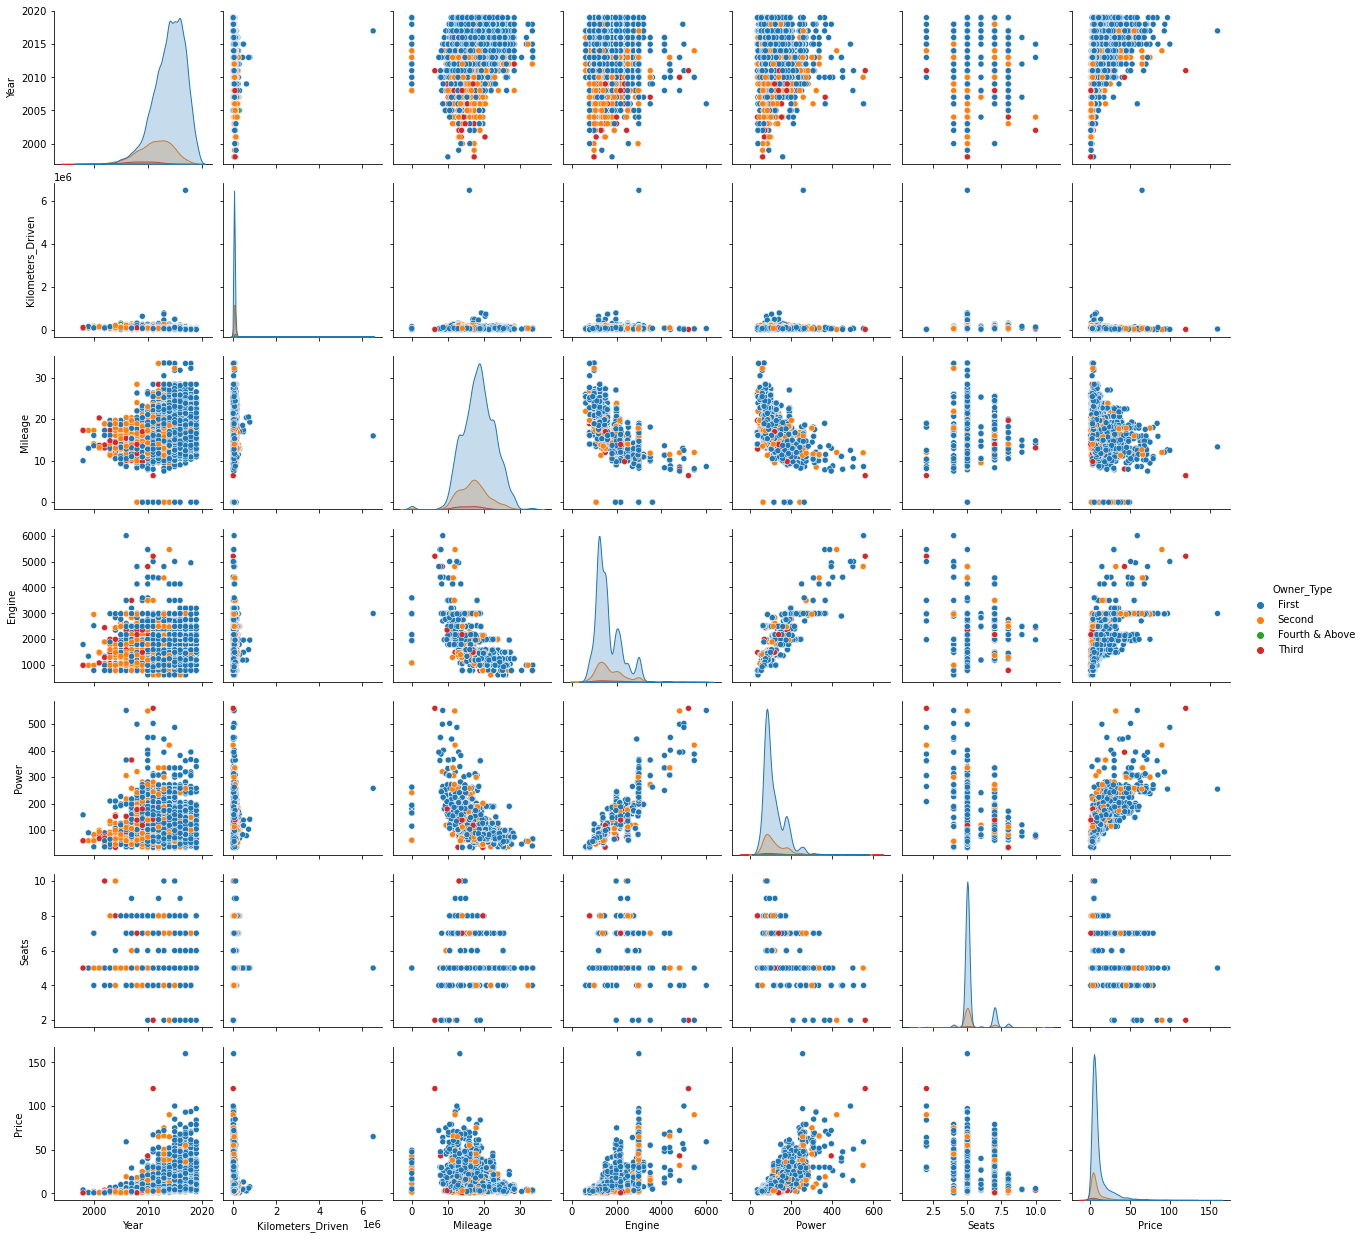

In [91]:
sns.pairplot(data,hue="Owner_Type")

- > **Analysis of categorical variables with each pair of numerical variables**

<h3>Data Preprocessing</h3>

<h6>Removing Corelated columns</h6>

In [92]:
data = data.drop('Engine',axis=1)
data = data.drop('Mileage',axis=1)

<h6>Separating Independent and Dependent Variables</h6>

In [93]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

<h6>Encoding Catogorical Variables</h6>

In [94]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
X[:,1] = le2.fit_transform(X[:,1])
X[:,2] = le3.fit_transform(X[:,2])
X[0]

array([18, 180, 1180, 'Mumbai', 'CNG', 'Manual', 'First', 2010, 72000,
       58.16, 5.0], dtype=object)

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4,5,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 18, 180, 1180, 2010, 72000,
       58.16, 5.0], dtype=object)

<h3>Data Splitting and Model Training</h3>

<h6>Train Test Splitting</h6>

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

<h3>Multiple Linear Regression</h3>

In [97]:
from sklearn.linear_model import LinearRegression
mul = LinearRegression()
mul.fit(X_train, Y_train)

LinearRegression()

In [98]:
y_m = mul.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
print("The model performance for the test set")
print("-------------------------------------------")
print('mse of multiple regression model     :', mean_squared_error(Y_test, y_m))
print('r2 score of multiple regression model     :', r2_score(Y_test, y_m))

The model performance for the test set
-------------------------------------------
mse of multiple regression model     : 38.50858959115399
r2 score of multiple regression model     : 0.7238218077324866


<h3>Polynomial Regression</h3>

In [100]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

In [101]:
degree=3

In [102]:
poly_features= PolynomialFeatures(degree=degree)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
 
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  
# predicting on test data-set
y_p = poly_model.predict(poly_features.fit_transform(X_test))

In [103]:
# evaluating the model on test dataset
mse_test = mean_squared_error(Y_test, y_p)
r2_test = r2_score(Y_test, y_p)
  
print("The model performance for the test set")
print("-------------------------------------------")
print("mse of test set is {}".format(mse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the test set
-------------------------------------------
mse of test set is 37.791691163854836
R2 score of test set is 0.7289633024949016


<h3>Support Vector Machine Regressor</h3>

In [104]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[:,21:28] = sc_x.fit_transform(X_train[:,21:28])
X_test_scaled[:,21:28] = sc_x.transform(X_test[:,21:28])
y_train_scaled = sc_y.fit_transform(Y_train.reshape(-1,1))

In [105]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled,y_train_scaled)

C:\Users\cheta\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [106]:
y_s=svr.predict(X_test_scaled)
y_s=sc_y.inverse_transform(y_s.reshape(-1,1))

In [107]:
print("The model performance for the test set")
print("-------------------------------------------")
print('mse of SVR model     :',mean_squared_error(Y_test, y_s) )
print('r2 score of SVR model     :', r2_score(Y_test, y_s))

The model performance for the test set
-------------------------------------------
mse of SVR model     : 16.890491509997588
r2 score of SVR model     : 0.8788637688041296


<h3>KNN Regressor</h3>

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19]}
knn =neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 9}

In [109]:
knn=neighbors.KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=7)

In [110]:
y_k=knn.predict(X_test)

In [111]:
print("The model performance for the test set")
print("-------------------------------------------")
print ('mse of knn regression :',mean_squared_error(Y_test, y_k))
print('r2 score of knn regression :',r2_score(Y_test, y_k))

The model performance for the test set
-------------------------------------------
mse of knn regression : 18.103087636995223
r2 score of knn regression : 0.8701671998084757


<h3> Decision Tree Regressor</h3>

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
y_t=tree.predict(X_test)

In [114]:
print("The model performance for the test set")
print("-------------------------------------------")
print('mse of decision tree :', mean_squared_error(Y_test, y_t))
print('r2 score of decision tree :',r2_score(Y_test, y_t))

The model performance for the test set
-------------------------------------------
mse of decision tree : 20.852126404255316
r2 score of decision tree : 0.8504514801398018


<h3>Random Forest Regressor</h3>

In [115]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 106, random_state = 0)
forest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=106, random_state=0)

In [116]:
y_f=forest.predict(X_test)

In [117]:
print("The model performance for the test set")
print("-------------------------------------------")
print('mse of random forest :', mean_squared_error(Y_test, y_f))
print('r2 score of random forest :', r2_score(Y_test, y_f))

The model performance for the test set
-------------------------------------------
mse of random forest : 10.976801010278509
r2 score of random forest : 0.9212759259145827


<h3>Models and Accuracy</h3>

In [118]:
print("   Models\t\t\tAccuracy")
print("-------------------------------------------")
print('Multiple regression \t', r2_score(Y_test, y_m))
print("Polynomial \t\t",r2_score(Y_test, y_p))
print('SVR \t\t\t', r2_score(Y_test, y_s))
print('KNN regression \t\t',r2_score(Y_test, y_k))
print('Decision tree \t\t',r2_score(Y_test, y_t))
print('Random forest \t\t', r2_score(Y_test, y_f))

   Models			Accuracy
-------------------------------------------
Multiple regression 	 0.7238218077324866
Polynomial 		 0.7289633024949016
SVR 			 0.8788637688041296
KNN regression 		 0.8701671998084757
Decision tree 		 0.8504514801398018
Random forest 		 0.9212759259145827


- > **Random Forest Regressor** performs better than rest of the models
- > We will use random forest regressor to predict prices of Data_Test

## Prediction of prices in Data_Test

In [119]:
data_test=pd.read_excel("Data_Test.xlsx")

In [120]:
data_test = data_test[data_test.Power!='null bhp']

In [121]:
data_test.Mileage = data_test.Mileage.str.replace(' km/kg',' kmpl')
data_test.Mileage = data_test.Mileage.str.replace(' kmpl','').astype(float)
data_test.Engine = data_test.Engine.str.replace(' CC','').astype(float)
data_test.Power = data_test.Power.str.replace(' bhp','').astype(float)

In [122]:
data_test=data_test.dropna(how='any')

In [123]:
columns = ['Name', 'Location','Fuel_Type','Transmission', 'Owner_Type', 'Year', 'Kilometers_Driven',  'Mileage', 'Engine', 'Power', 'Seats']
data_test = data_test.reindex(columns=columns)

In [124]:
columns = ['Name', 'Brand', 'Model','Version', 'Location','Fuel_Type','Transmission', 'Owner_Type', 'Year', 'Kilometers_Driven',  'Mileage', 'Engine', 'Power', 'Seats']
data_test = data_test.reindex(columns=columns)
data_test.Brand = data_test.Name.apply(lambda a:a.split()[0])
data_test.Model= data_test.Name.apply(lambda a:a.split()[1])
data_test.Version= data_test.Name.apply(lambda a:a.split()[2:])
version=[]
for i in data_test.Version:
    version.append(" ".join(i))
data_test.Version=version
data_test=data_test.drop(columns='Name')
data_test.head()

,Brand,Model,Version,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,Maruti,Alto,K10 LXI CNG,Delhi,CNG,Manual,First,2014,40929,32.26,998.0,58.20,4.0
1,Maruti,Alto,800 2016-2019 LXI,Coimbatore,Petrol,Manual,Second,2013,54493,24.70,796.0,47.30,5.0
2,Toyota,Innova,Crysta Touring Sport 2.4 MT,Mumbai,Diesel,Manual,First,2017,34000,13.68,2393.0,147.80,7.0
4,Hyundai,i20,Magna,Mumbai,Petrol,Manual,First,2014,29000,18.50,1197.0,82.85,5.0
5,Mahindra,XUV500,W8 2WD,Coimbatore,Diesel,Manual,Second,2016,85609,16.00,2179.0,140.00,7.0


In [125]:
data_test = data_test.drop('Engine',axis=1)
data_test = data_test.drop('Mileage',axis=1)

In [126]:
X_TEST=data_test.iloc[:,:].values

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_TEST[:,0] = le.fit_transform(X_TEST[:,0])
X_TEST[:,1] = le.fit_transform(X_TEST[:,1])
X_TEST[:,2] = le.fit_transform(X_TEST[:,2])
X_TEST[0]

array([15, 16, 447, 'Delhi', 'CNG', 'Manual', 'First', 2014, 40929, 58.2,
       4.0], dtype=object)

In [128]:
X_TEST = np.array(ct.transform(X_TEST))
X_TEST[0]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 15, 16, 447, 2014, 40929,
       58.2, 4.0], dtype=object)

In [129]:
y_predicted = forest.predict(X_TEST).reshape(-1,1)

In [130]:
y_predicted.reshape(-1,1)

array([[56.77933962],
       [55.00858491],
       [56.69160377],
       ...,
       [57.84169811],
       [55.12490566],
       [57.15301887]])

In [131]:
data_test['Predicted Price'] = y_predicted

In [132]:
data_test

,Brand,Model,Version,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Power,Seats,Predicted Price
0,Maruti,Alto,K10 LXI CNG,Delhi,CNG,Manual,First,2014,40929,58.20,4.0,56.779340
1,Maruti,Alto,800 2016-2019 LXI,Coimbatore,Petrol,Manual,Second,2013,54493,47.30,5.0,55.008585
2,Toyota,Innova,Crysta Touring Sport 2.4 MT,Mumbai,Diesel,Manual,First,2017,34000,147.80,7.0,56.691604
4,Hyundai,i20,Magna,Mumbai,Petrol,Manual,First,2014,29000,82.85,5.0,53.902075
5,Mahindra,XUV500,W8 2WD,Coimbatore,Diesel,Manual,Second,2016,85609,140.00,7.0,57.749434
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Vento,Diesel Trendline,Hyderabad,Diesel,Manual,First,2011,89411,103.60,5.0,98.027264
1230,Volkswagen,Polo,GT TSI,Mumbai,Petrol,Automatic,First,2015,59000,103.60,5.0,53.902075
1231,Nissan,Micra,Diesel XV,Kolkata,Diesel,Manual,First,2012,28000,63.10,5.0,57.841698
1232,Volkswagen,Polo,GT TSI,Pune,Petrol,Automatic,Third,2013,52262,103.60,5.0,55.124906


- > Above table shows the **Predicted Prices** of the **Test Dataset**

In [133]:
data_test.to_csv('Data_Predicted.csv')